In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
#Gradient Descent
theta = 3
alpha = 0.1
dat = []
for oo in range(0, 10):
    res = alpha * 2 * theta #update rule
    print("{0:.4f} {1:.4f}".format(theta, res))
    dat.append([theta, theta**2])
    theta = theta - res

3.0000 0.6000
2.4000 0.4800
1.9200 0.3840
1.5360 0.3072
1.2288 0.2458
0.9830 0.1966
0.7864 0.1573
0.6291 0.1258
0.5033 0.1007
0.4027 0.0805


In [3]:
tmp = pd.DataFrame(dat)# reading Data Frame
tmp

,0,1
0,3.000000,9.000000
1,2.400000,5.760000
2,1.920000,3.686400
3,1.536000,2.359296
4,1.228800,1.509949
5,0.983040,0.966368
6,0.786432,0.618475
7,0.629146,0.395824
8,0.503316,0.253327
9,0.402653,0.162130


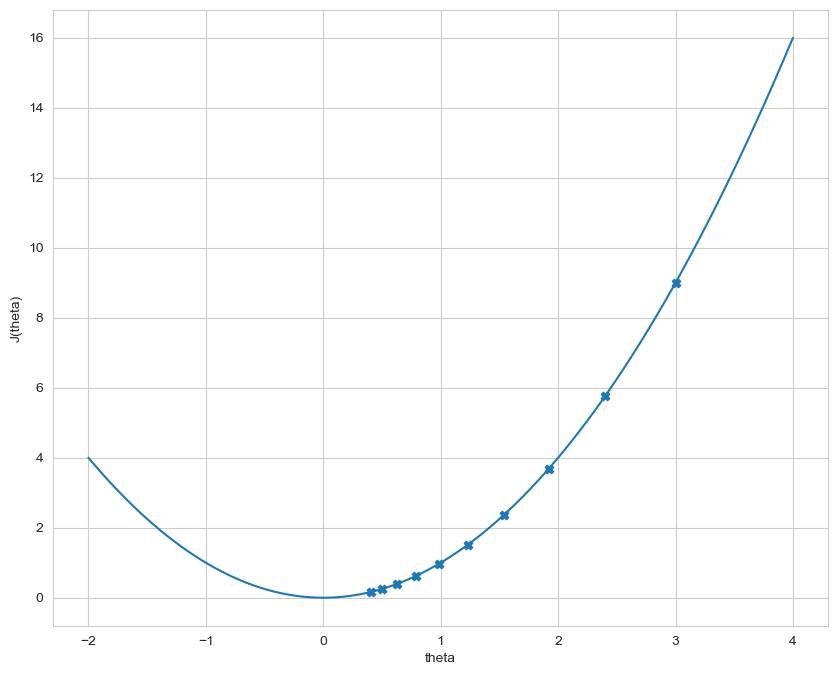

In [4]:
plt.figure(figsize=(10,8))#plotting Data
plt.plot(np.linspace(-2, 4, 100), np.linspace(-2, 4, 100)**2);
plt.scatter(tmp.iloc[:, 0], tmp.iloc[:, 1], marker='X');
plt.xlabel('theta');
plt.ylabel('J(theta)');



In [5]:
theta = 3
alpha = 0.01#updating learning rate
dat = []# list
for oo in range(0, 10):
    res = alpha * (4 * theta**3 + 2 * theta) #update rule
    print("{0:.4f} {1:.4f}".format(theta, res))
    dat.append([theta, theta ** 4 + theta**2])#appending data to list
    theta = theta - res

3.0000 1.1400
1.8600 0.2946
1.5654 0.1847
1.3807 0.1329
1.2478 0.1027
1.1451 0.0830
1.0621 0.0692
0.9930 0.0590
0.9339 0.0513
0.8827 0.0452


In [6]:
tmp = pd.DataFrame(dat)
tmp

,0,1
0,3.000000,90.000000
1,1.860000,15.428432
2,1.565406,8.455422
3,1.380657,5.539863
4,1.247771,3.980968
5,1.145108,3.030703
6,1.062144,2.400869
7,0.992970,1.958167
8,0.933949,1.633098
9,0.882684,1.386175


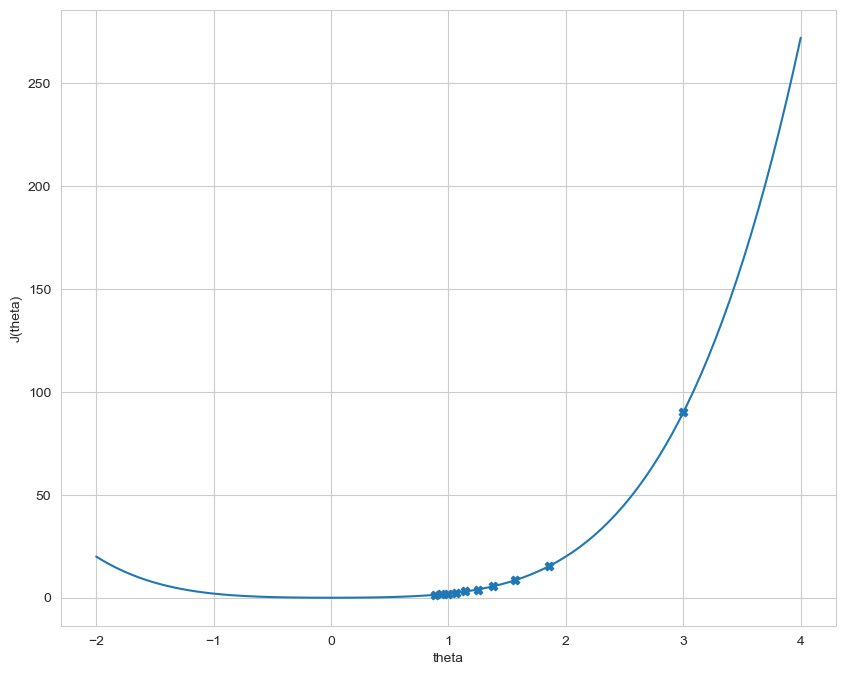

In [7]:
plt.figure(figsize=(10,8))#plotting Grad to check Global minima
plt.plot(np.linspace(-2, 4, 100), np.linspace(-2, 4, 100)**4 + np.linspace(-2, 4, 100)**2);
plt.scatter(tmp.iloc[:, 0], tmp.iloc[:, 1], marker='X');
plt.xlabel('theta');
plt.ylabel('J(theta)');

In [8]:
#Importing library modules and working dataset
from sklearn.datasets import load_boston
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)# DataFrame
df.head()



C:\Users\Hamza Durez\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
X = df[['RM']].values#Value of x
y = boston_data.target#value of y

In [10]:
#scaling data
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y.reshape(-1, 1)).flatten()



In [11]:
alpha = 0.0001#Learning rate
w_ = np.zeros(1 + X_std.shape[1])
cost_ = []
n_ = 100

for i in range(n_):
    y_pred = np.dot(X_std, w_[1:]) + w_[0]
    errors = (y_std - y_pred)
    
    w_[1:] += alpha * X_std.T.dot(errors)
    w_[0] += alpha * errors.sum() 
    
    cost = (errors**2).sum() / 2.0 #sum of squared error
    cost_.append(cost)

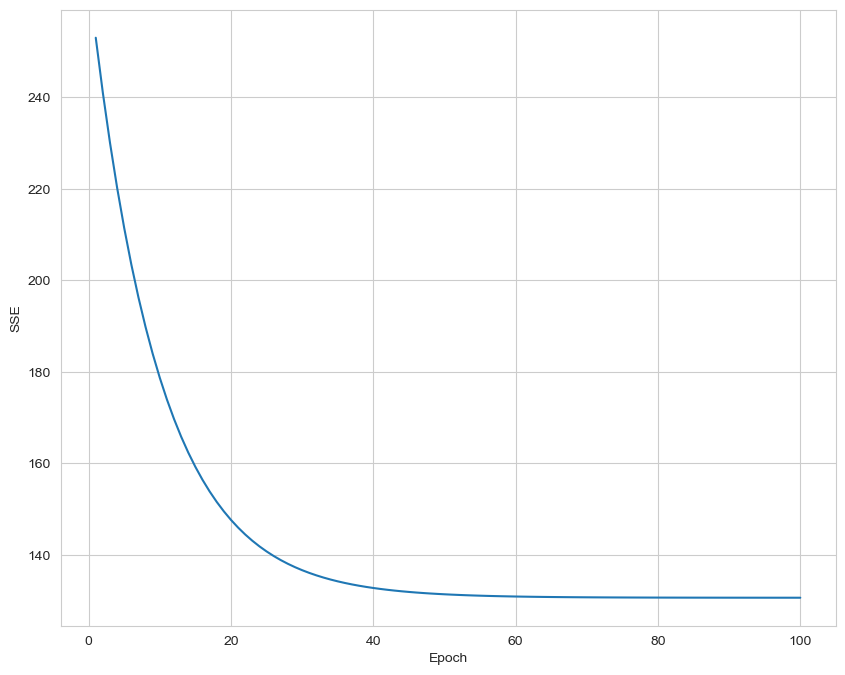

In [12]:
#plotting data shows SSE reduce as per Epochs
plt.figure(figsize=(10, 8))
plt.plot(range(1, n_ + 1), cost_)
plt.ylabel('SSE'); #sums of sqaured errors
plt.xlabel('Epoch');



polynomial regression with regularization

In [13]:
def __init__(self, d=5):
    self.d = d

In [14]:
def fit(self, X, y):
    A = []
    C = []
    for i in range(self.d):
        A_row = []
        for j in range(self.d):
            A_row.append(np.sum([x**(i+j) for x in X]))
        A.append(A_row)
        C.append(np.sum(np.multiply([x**i for x in X], y)))
    w = np.linalg.inv(A) * np.transpose(C)
    self.w = w

In [15]:
def predict(self, X):
    pred = []
    for x in X:
        pred.append(np.sum([w_j * x**j for j, w_j in
                enumerate(self.w)]))
    pred
    return pred


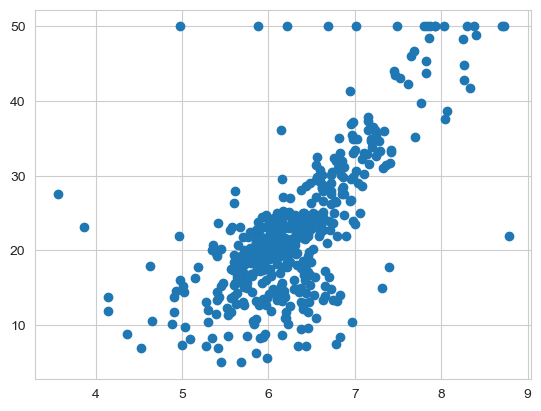

In [16]:

plt.scatter(X, y)
plt.show()

L2 Regularization

In [17]:
class regressionModel:
    def __init__(self, d=5, lbda=0.5):
        self.d = d
        self.lbda = lbda
    def fit(self, X, y):
        A = []
        C = []
        for i in range(self.d):
            A_row = []
            for j in range(self.d):
                lbda = 0 if i != j else self.lbda
                A_row.append(np.sum([x**(i+j) +
                             lbda for x in X]))
            A.append(A_row)
            C.append(np.sum(
                     np.multiply([x**i for x in X], y)))
        w = np.linalg.inv(A) * np.transpose(C)
        self.w = w
    def predict(self, X):
        pred = []
        for x in X:
            pred.append(np.sum(
                 [w_j * x**j for j, w_j in enumerate(self.w)]))
        return pred

In [18]:
model = regressionModel(d=5)
model.fit(X, y)


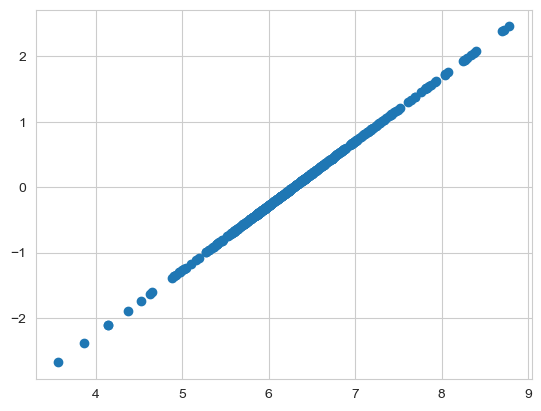

In [19]:

plt.scatter(X, y_pred)
plt.show()

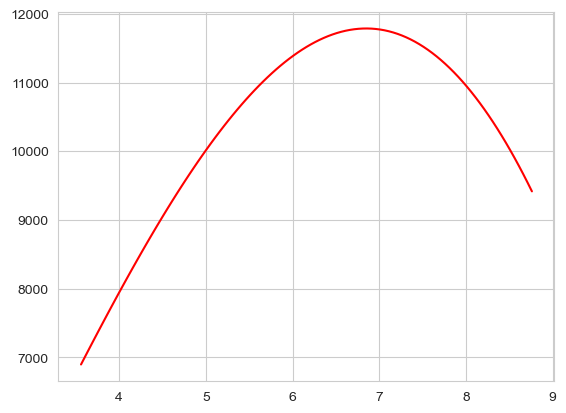

In [20]:

x_min = min(X)
x_max = max(X)
xx = np.arange(x_min, x_max, 0.05)
plt.plot(xx, model.predict(xx), c="red")

plt.show()

In [21]:
w_

array([-4.71089834e-16,  6.91495099e-01])

In [22]:
w=0
b=0

def forward_1(x):
    return np.dot(x,w)+b

def loss(y,y_pred):
    loss=np.sqrt(np.mean((y_pred-y)**2))
    return loss

def gradient_1(x,y,y_pred):
    m = x.shape[0]
    # gradient w.r.t weights
    dw= (2/m)*np.dot(x.T,(y_pred - y))
    #gradient w.r.t bias
    db= (2/m)*np.sum((y_pred - y))
    return dw,db

# Training loop
losses1=[]
for epoch in range(100):
    losses=[]
    y_pred=forward_1(X)
    dw,db = gradient_1(X, y,y_pred)
    w= w -0.01 * dw
    b=b-0.01*db
    y_pred=forward_1(X)
    l = loss(y,y_pred)
    losses.append(l)
    losses1.append(l)
    if(epoch%10==0):
        print("progress:", epoch, "loss=", np.mean(losses))


progress: 0 loss= 223.3172531730124
progress: 10 loss= 2041375875079.784
progress: 20 loss= 1.86613433528454e+22
progress: 30 loss= 1.705936373521492e+32
progress: 40 loss= 1.5594905765773408e+42
progress: 50 loss= 1.425616392370619e+52
progress: 60 loss= 1.3032346130980465e+62
progress: 70 loss= 1.1913586753534427e+72
progress: 80 loss= 1.0890867070863538e+82
progress: 90 loss= 9.955942572880602e+91
